In [1]:
import numpy as np
from numpy import linalg as npla
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def eigen(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return (eigenValues, eigenVectors)

In [3]:
L=15.0  # box length is 2L; [-L,L]
m=1     # particle mass 
hbar=1  # 1 in atomic units

In [4]:
def potential(x): # 1-D molecule
    potential = -6/np.sqrt((x+4)**2+1)-4/np.sqrt((x-4)**2+1)
    return potential
    
def fn_V(x):
    psi_i=np.sqrt(1/L)*np.sin((i+1)*(x-L)*np.pi/(2*L))
    psi_j=np.sqrt(1/L)*np.sin((j+1)*(x-L)*np.pi/(2*L))
    Nx=x.size
    pot=np.zeros(Nx)
    for ix in range(Nx):
        pot[ix]=potential(x[ix])
    
    fn_V=psi_i * pot * psi_j
    return fn_V

for iN in range(0,6):
    
    N=2**iN    # No. of basis functions

    V=np.zeros([N,N])
    T=np.zeros([N,N])
    H=np.zeros([N,N])
    
    for i in range(N):
        for j in range(N):
            Int_V=integrate.quadrature(fn_V, -L, L,maxiter=1000)
            V[i][j]=Int_V[0] 
        T[i][i]=(i+1)**2 * hbar**2 * np.pi**2 / (8 * m * L**2)

    H=T+V

    E,V=eigen(H)

    print("Number of basis: ", N, ", ground state energy is:", E[0])

Number of basis:  1 , ground state energy is: -3.056325806817095
Number of basis:  2 , ground state energy is: -3.1566405419740127
Number of basis:  4 , ground state energy is: -3.924186324234965
Number of basis:  8 , ground state energy is: -4.547315446207614
Number of basis:  16 , ground state energy is: -5.269287932988689
Number of basis:  32 , ground state energy is: -5.486268540734779


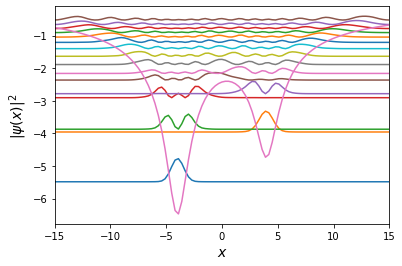

In [5]:
x=np.linspace(-L, L, 101)
Vharm=np.zeros(101)
for ix in range(101):
    Vharm[ix]=potential(x[ix])

for k in range(16):    
    psi0=np.zeros(101)
    for i in range(N):
        psi0=psi0+V[i][k]*np.sqrt(1/L)*np.sin((i+1)*(x-L)*np.pi/(2*L))
    
    plt.plot(x,np.abs(psi0)**2+E[k])


plt.plot(x,Vharm)
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$|\psi(x)|^2$", fontsize=14)
plt.savefig('psi_1Dmol.png') 
#plt.legend(['n = 0','n = 1','n = 2','n = 3','n = 4'])
plt.xlim(-L,L)
#plt.ylim(-10,10)
plt.show()